Neste notebook, será utilizado o arquivo "dados_preprocessados.csv", onde foram observadas informações úteis para a criação de uma nova coluna, que será a base do restante do projeto e a partir dela serão geradas novas visualizações.

Foi criando um novo arquivo csv "dados_processados" que será utilizado para EDA.

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/delitos_NY_2020/master/1%20-%20Manipula%C3%A7%C3%A3o%20de%20dados/dados_pre_processados.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140413 entries, 0 to 140412
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   data_da_ocorrencia   140413 non-null  object 
 1   descricao_da_ofensa  140376 non-null  object 
 2   nivel_da_ofensa      139024 non-null  object 
 3   bairro               140413 non-null  object 
 4   idade_do_infrator    140413 non-null  object 
 5   sexo_do_infrator     140413 non-null  object 
 6   raca_do_infrator     140413 non-null  object 
 7   latitude             140413 non-null  float64
 8   longitude            140413 non-null  float64
 9   ano                  140413 non-null  int64  
 10  dia                  140413 non-null  int64  
 11  mes                  140413 non-null  int64  
 12  dia_da_semana        140413 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 13.9+ MB


 - Conventerndo a coluna data_da_ocorrencia para formato datetime

In [6]:
df["data_da_ocorrencia"] = pd.to_datetime(df["data_da_ocorrencia"] )

In [7]:
df = df.dropna()

In [8]:
df = df.reset_index()
df = df.drop('index', axis = 1)

In [9]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138987 entries, 0 to 138986
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_da_ocorrencia   138987 non-null  datetime64[ns]
 1   descricao_da_ofensa  138987 non-null  object        
 2   nivel_da_ofensa      138987 non-null  object        
 3   bairro               138987 non-null  object        
 4   idade_do_infrator    138987 non-null  object        
 5   sexo_do_infrator     138987 non-null  object        
 6   raca_do_infrator     138987 non-null  object        
 7   latitude             138987 non-null  float64       
 8   longitude            138987 non-null  float64       
 9   ano                  138987 non-null  int64         
 10  dia                  138987 non-null  int64         
 11  mes                  138987 non-null  int64         
 12  dia_da_semana        138987 non-null  object        
dtypes: datetime64[

In [11]:
df.shape

(138987, 13)

## 2- Preparaçao dos dados


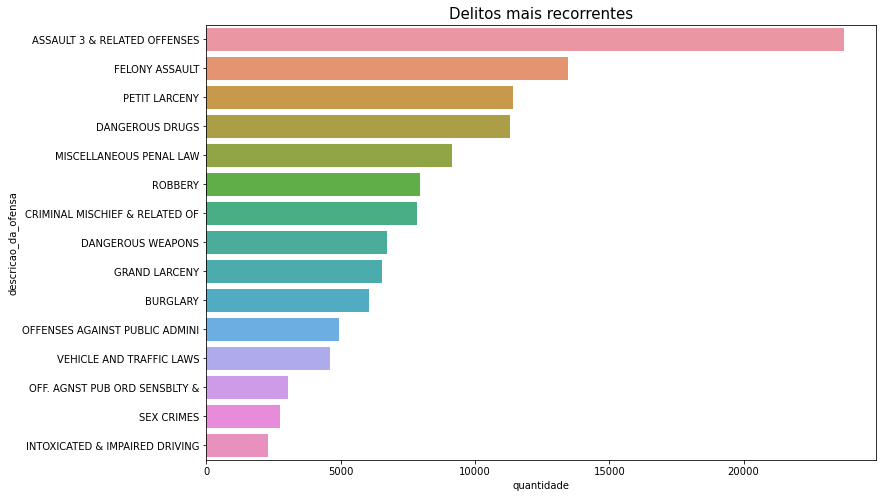

In [12]:
tipos_de_delitos = df.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']


f, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y = 'descricao_da_ofensa' , x = 'quantidade' , data = tipos_de_delitos.head(15))
titulo='Delitos mais recorrentes'
plt.title(titulo, fontsize=15)
plt.show()

 - De acordo com os dados acima visualizados, podemos  criar um classificador que consiga distinguir delitos graves de delitos mais leves e que possa dizer a chance de ocorrer determinada prática em algum local.

In [13]:
df.descricao_da_ofensa.value_counts().head(15)

ASSAULT 3 & RELATED OFFENSES      23731
FELONY ASSAULT                    13475
PETIT LARCENY                     11406
DANGEROUS DRUGS                   11289
MISCELLANEOUS PENAL LAW            9133
ROBBERY                            7948
CRIMINAL MISCHIEF & RELATED OF     7831
DANGEROUS WEAPONS                  6710
GRAND LARCENY                      6542
BURGLARY                           6056
OFFENSES AGAINST PUBLIC ADMINI     4925
VEHICLE AND TRAFFIC LAWS           4589
OFF. AGNST PUB ORD SENSBLTY &      3061
SEX CRIMES                         2730
INTOXICATED & IMPAIRED DRIVING     2299
Name: descricao_da_ofensa, dtype: int64

In [14]:
df.nivel_da_ofensa.value_counts().head()

contravencao    72992
crime           65264
violacao          549
outro             182
Name: nivel_da_ofensa, dtype: int64

 ### Observações.
 
 - Considerando que delitos praticados com nivel de ofensa igual a crime são graves e os outros tipos são considerados leves:
  
   - criar uma nova coluna com a informação se o delito e grave ou não de acordo com a sa classificação quanto ao nível da ofensa.

Explorando os registros da coluna descricao_da_ofensa

 - Registros totais

In [15]:
df.descricao_da_ofensa.value_counts().head()

ASSAULT 3 & RELATED OFFENSES    23731
FELONY ASSAULT                  13475
PETIT LARCENY                   11406
DANGEROUS DRUGS                 11289
MISCELLANEOUS PENAL LAW          9133
Name: descricao_da_ofensa, dtype: int64

- Registros violação

In [16]:
violacao = df.query('nivel_da_ofensa == "violacao"')
violacao.descricao_da_ofensa.value_counts()

OTHER STATE LAWS                  260
MISCELLANEOUS PENAL LAW           122
ADMINISTRATIVE CODE                75
DISORDERLY CONDUCT                 40
HARRASSMENT 2                      38
LOITERING/GAMBLING (CARDS, DIC     12
NEW YORK CITY HEALTH CODE           1
ADMINISTRATIVE CODES                1
Name: descricao_da_ofensa, dtype: int64

 - Registros contravenção

In [17]:
contravencao= df.query('nivel_da_ofensa == "contravencao"')
contravencao.descricao_da_ofensa.value_counts()

ASSAULT 3 & RELATED OFFENSES            23731
PETIT LARCENY                           11406
DANGEROUS DRUGS                          5908
OFFENSES AGAINST PUBLIC ADMINI           4925
VEHICLE AND TRAFFIC LAWS                 4331
CRIMINAL MISCHIEF & RELATED OF           4293
OFF. AGNST PUB ORD SENSBLTY &            3059
INTOXICATED & IMPAIRED DRIVING           2260
SEX CRIMES                               2231
CRIMINAL TRESPASS                        1552
DANGEROUS WEAPONS                        1499
OFFENSES INVOLVING FRAUD                 1226
OTHER TRAFFIC INFRACTION                  958
OTHER OFFENSES RELATED TO THEF            813
POSSESSION OF STOLEN PROPERTY             771
OFFENSES AGAINST THE PERSON               708
BURGLAR'S TOOLS                           543
UNAUTHORIZED USE OF A VEHICLE             522
OTHER STATE LAWS (NON PENAL LA            490
PROSTITUTION & RELATED OFFENSES           422
FRAUDS                                    387
GAMBLING                          

 - Registros crime

In [18]:
crime = df.query('nivel_da_ofensa == "crime"')
crime.descricao_da_ofensa.value_counts()

FELONY ASSAULT                     13475
MISCELLANEOUS PENAL LAW             9011
ROBBERY                             7948
GRAND LARCENY                       6542
BURGLARY                            6056
DANGEROUS DRUGS                     5381
DANGEROUS WEAPONS                   5211
CRIMINAL MISCHIEF & RELATED OF      3538
FORGERY                             1852
GRAND LARCENY OF MOTOR VEHICLE      1227
MURDER & NON-NEGL. MANSLAUGHTE      1190
POSSESSION OF STOLEN PROPERTY       1065
NYS LAWS-UNCLASSIFIED FELONY         596
RAPE                                 568
SEX CRIMES                           499
INTOXICATED/IMPAIRED DRIVING         346
VEHICLE AND TRAFFIC LAWS             254
THEFT-FRAUD                          138
ARSON                                 97
PROSTITUTION & RELATED OFFENSES       50
OTHER STATE LAWS (NON PENAL LA        46
KIDNAPPING & RELATED OFFENSES         44
INTOXICATED & IMPAIRED DRIVING        39
CHILD ABANDONMENT/NON SUPPORT         24
GAMBLING        

 ### Observando pelos registros acima, os delitos classificados como crimes são sempre mais graves , logo iremos pegá-los como parâmetro para considerar o delito como grave ou não.
 
 - Criar a coluna grave, onde os crimes terão valor 1 e o que não for crime terá valor 0.

 - Criando a coluna Grave.

In [19]:
df['grave'] = df['nivel_da_ofensa']

In [20]:
df.head()

,data_da_ocorrencia,descricao_da_ofensa,nivel_da_ofensa,bairro,idade_do_infrator,sexo_do_infrator,raca_do_infrator,latitude,longitude,ano,dia,mes,dia_da_semana,grave
0,2020-12-25,FELONY ASSAULT,crime,Bronx,25-44,M,BLACK,40.808798,-73.916184,2020,25,12,Friday,crime
1,2020-12-22,ROBBERY,crime,Manhattan,18-24,M,BLACK HISPANIC,40.845956,-73.937813,2020,22,12,Tuesday,crime
2,2020-12-21,FELONY ASSAULT,crime,Queens,25-44,M,BLACK,40.682398,-73.840079,2020,21,12,Monday,crime
3,2020-12-10,FELONY ASSAULT,crime,Queens,18-24,M,BLACK,40.689336,-73.800409,2020,10,12,Thursday,crime
4,2020-12-09,FORGERY,crime,Staten_Island,18-24,M,BLACK,40.634708,-74.124241,2020,9,12,Wednesday,crime


In [21]:
df['grave'] = df['grave'].apply(lambda x: 1 if x=='crime' else 0)

In [22]:
df.grave.value_counts()

0    73723
1    65264
Name: grave, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138987 entries, 0 to 138986
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   data_da_ocorrencia   138987 non-null  datetime64[ns]
 1   descricao_da_ofensa  138987 non-null  object        
 2   nivel_da_ofensa      138987 non-null  object        
 3   bairro               138987 non-null  object        
 4   idade_do_infrator    138987 non-null  object        
 5   sexo_do_infrator     138987 non-null  object        
 6   raca_do_infrator     138987 non-null  object        
 7   latitude             138987 non-null  float64       
 8   longitude            138987 non-null  float64       
 9   ano                  138987 non-null  int64         
 10  dia                  138987 non-null  int64         
 11  mes                  138987 non-null  int64         
 12  dia_da_semana        138987 non-null  object        
 13  grave         

 - Criando a coluna final de semana.

In [24]:
df['dia_da_semana'].value_counts()

Wednesday    24614
Thursday     23274
Tuesday      22884
Friday       19424
Monday       17457
Saturday     16585
Sunday       14749
Name: dia_da_semana, dtype: int64

In [25]:
df['fds'] = df['dia_da_semana'].apply(lambda x: 1 if x=='Sunday' or x =='Saturday' else 0)

 - Criando a coluna assalto.

## Criando a coluna de crimes relacionados a assaltos/roubos.



    De acordo com a definição dos crimes, classificamos os tipos abaixo como sendo crimes de assalto/roubo que são práticas mais violentas e mais se assemelham a realidade do Brasil.
    - 

### felony assault:
    - agressão agravada ou agressão envolve circunstâncias que tornam o crime mais grave, como quando a vítima é ameaçada ou experimenta violência significativa que atinge substancialmente mais do que um tapa leve.

### robbery:
    - a ação de tomar bens ilegalmente de uma pessoa ou lugar pela força ou ameaça de força.

### dangerous weapons:
    - um objeto que, quando utilizado como instrumento de infração, é capaz de causar lesões corporais graves.

In [26]:
df['assalto'] = df['descricao_da_ofensa'].apply(lambda x: 1 if x=='ROBBERY' or x =='FELONY ASSAULT' or x=='DANGEROUS WEAPONS'  else 0)

 - Gerando um arquivo csv.

In [27]:
df.to_csv('dados_processados.csv' ,index =False , encoding = 'utf-8')